Assignment 4: Diagnostic Systems
Group 13
Module 4
Francisco Castellano Rodriguez - 020425T136- fracas@chalmers.se
Ivan Frolyak Ostrovskyy - 000706T617 - frolyak@chalmers.se
Program: Exchange Student (Erasmus)
Time spent: 10h each.
We hereby declare that we have both actively participated in solving every exercise. All
solutions are entirely our own work, without having taken part in other solutions.

1. READING AND REFLECTION

These papers show a wide range of machine learning applications, from theoretical considerations of model interpretability to practical applications in medical diagnostics, emphasizing the importance of clear interpretability criteria and machine learning's potential to revolutionize fields such as healthcare.

The paper "The Mythos of Model Interpretability" goes into the complexities of machine learning model interpretability, emphasizing the lack of a uniform definition and defining interpretability as transparency or post-hoc explanations. It compares the interpretability of linear models to deep neural networks and warns against potentially misleading post-hoc interpretations, highlighting the need of balancing interpretability with predictive capability.

Moreover, a statement of this paper has given us an idea for the third part of the implementation and for our own classifier we are going to use the model from this cite:
‘ According to its own technical report, FICO trains credit models using logistic regression, specifically citing interpretability as a motivation for the choice of model.’.

Finally, "Machine Learning Techniques to Diagnose Breast Cancer from Image-Processed Nuclear Features of Fine Needle Aspirates" looks into how machine learning and digital image analysis may be used to improve breast cancer diagnosis accuracy. The study shows how this technique has the potential to reach high diagnostic precision in breast cancer diagnostics, with a system achieving 100% accuracy in a test set of 54 samples.


2. IMPLEMENTATION

The metrics used for evaluating our models was accuracy for both validation and test set.

First, we are going to upload the dataset that we have given into a dataframe, then we can start working with it.

In [1]:
import pickle as pkl
import pandas as pd
with open("wdbc.pkl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'file.csv')

Then, we take a look a the data, it's length and its features.

In [2]:
df.head()

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
print(df.columns)

Index(['id', 'malignant', 'radius_0', 'texture_0', 'perimeter_0', 'area_0',
       'smoothness_0', 'compactness_0', 'concavity_0', 'concave points_0',
       'symmetry_0', 'fractal dimension_0', 'radius_1', 'texture_1',
       'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1',
       'concave points_1', 'symmetry_1', 'fractal dimension_1', 'radius_2',
       'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
       'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2'],
      dtype='object')


**Classifier - rule-based**

Firstly we are going to import all the necessary libraries which are essential for handling the dataset and performing calculations. Basically for data manipulation. We also are going to be using M.L and Visualization Libraries to get this part of the assignment done.

With that said, in the next code-frame we are going to perform some basic pre-processing and splitting of the data into labels and features. We employ "train_test_split" to partition the dataset into a training set (60% of data and the rest is for the temporary set). Then, this temporary dataset is divided equaly into validation and test sets.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import graphviz
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [6]:
#preprocessing
X = df.drop('malignant', axis = 1)
y = df['malignant']
print(y.shape)
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.4, random_state=3)
val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, test_size=0.5, random_state=3)
print(train_X.shape)
print(X.shape)
print(test_X.shape)
print(train_X.shape)
print(val_X.shape)

(569,)
(341, 31)
(569, 31)
(114, 31)
(341, 31)
(114, 31)


For the "rule-based" classifier we are going to evaluate cell characteristics such as size, shape, texture, and homogeneity against predefined criteria to determine if a sample is indicative of malignant cancer.
Related to code-frame we define an object of mean values and define functions to calculate the mentioned characteristics. There is also a function to check rather the result "is_abnormal" or not. Finally, we got the "rule_based_classifier1" function that determines the values for each characteristic and check if any the characteristics are abnormal. If it's malignant it's classified as 1, or bening (0). Mention that we suppose as well that all features that conform the same 'class'(size, shape, etc..) have the same impact.

In [7]:
#Size is measured by radius and area.
#Shape is measured by smoothness, concavity, compactness, concave points, symmetry and fractal dimension.
#Texture: texture
#Homogenity: symmetry and perimeter.

mean_values = {
    'radius': train_X['radius_0'].mean(),
    'texture': train_X['texture_0'].mean(),
    'perimeter': train_X['perimeter_0'].mean(),
    'area': train_X['area_0'].mean(),
    'smoothness': train_X['smoothness_0'].mean(),
    'compactness': train_X['compactness_0'].mean(),
    'concavity': train_X['concavity_0'].mean(),
    'concave points': train_X['concave points_0'].mean(),
    'symmetry': train_X['symmetry_0'].mean(),
    'fractal dimension': train_X['fractal dimension_0'].mean()
}

def is_abnormal(value, mean):
    return value > mean

def calculate_size(radius, area):
    size = (radius + area) / 2
    return is_abnormal(size, (mean_values['radius'] + mean_values['area']) / 2)

def calculate_shape(smoothness, concavity, compactness, concave_points, symmetry, fractal_dimension):
    shape = (smoothness + concavity + compactness + concave_points + symmetry + fractal_dimension) / 6
    return is_abnormal(shape, sum([mean_values[k] for k in ['smoothness', 'concavity', 'compactness', 'concave points', 'symmetry', 'fractal dimension']]) / 6)

def calculate_texture(texture):
    return is_abnormal(texture, mean_values['texture'])

def calculate_homogeneity(symmetry, perimeter):
    homogeneity = (symmetry + perimeter) / 2
    return is_abnormal(homogeneity, (mean_values['symmetry'] + mean_values['perimeter']) / 2)

def rule_based_classifier1(df):
    size_abnormal = calculate_size(df['radius_0'], df['area_0'])
    shape_abnormal = calculate_shape(df['smoothness_0'], df['concavity_0'], df['compactness_0'], df['concave points_0'], df['symmetry_0'], df['fractal dimension_0'])
    texture_abnormal = calculate_texture(df['texture_0'])
    homogeneity_abnormal = calculate_homogeneity(df['symmetry_0'], df['perimeter_0'])
    
    if size_abnormal.any() or shape_abnormal.any() or texture_abnormal.any() or homogeneity_abnormal.any():
        return 1
    else:
        return 0

# Example: Call the classifier with the test set features
classification_results = test_X.apply(rule_based_classifier1, axis=1)
print(f"The classification results are:\n{classification_results}")


The classification results are:
161    1
129    1
232    1
174    0
493    0
      ..
284    0
175    0
549    1
53     1
235    1
Length: 114, dtype: int64


In [8]:
val_predictions1 = val_X.apply(rule_based_classifier1, axis=1)
test_predictions1 = test_X.apply(rule_based_classifier1, axis=1)

val_accuracy1 = accuracy_score(val_y, val_predictions1)
test_accuracy1 = accuracy_score(test_y, test_predictions1)

print(f"Validation Accuracy: {val_accuracy1}")
print(f"Test Accuracy: {test_accuracy1}")

Validation Accuracy: 0.7280701754385965
Test Accuracy: 0.7280701754385965


In order to improve our "rule-based" classifier we can apply a better mathematical approach. We decided to use the standard deviation given and seeing the upper and lower bounds between the mean and the standard deviation. We can multiply this std by 2 to give a higher margin to finally decide if the values are abnormal or not.

In [9]:
#Size is measured by radius and area.
#Shape is measured by smoothness, concavity,
#compactness, concave points, symmetry and fractal dimension.
#Texture is texture
#Homogenity: symmetry and perimeter.
mean_values = {
    'radius': train_X['radius_0'].mean(),
    'texture': train_X['texture_0'].mean(),
    'perimeter': train_X['perimeter_0'].mean(),
    'area': train_X['area_0'].mean(),
    'smoothness': train_X['smoothness_0'].mean(),
    'compactness': train_X['compactness_0'].mean(),
    'concavity': train_X['concavity_0'].mean(),
    'concave points': train_X['concave points_0'].mean(),
    'symmetry': train_X['symmetry_0'].mean(),
    'fractal dimension': train_X['fractal dimension_0'].mean()
}
std_values = {
    'radius': train_X['radius_1'].mean(),
    'texture': train_X['texture_1'].mean(),
    'perimeter': train_X['perimeter_1'].mean(),
    'area': train_X['area_1'].mean(),
    'smoothness': train_X['smoothness_1'].mean(),
    'compactness': train_X['compactness_1'].mean(),
    'concavity': train_X['concavity_1'].mean(),
    'concave points': train_X['concave points_1'].mean(),
    'symmetry': train_X['symmetry_1'].mean(),
    'fractal dimension': train_X['fractal dimension_1'].mean()
}

def is_abnormal(value, mean, std):
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    return value < lower_bound or value > upper_bound

def calculate_size(radius, area):
    size = (radius + area) / 2
    return is_abnormal(size, (mean_values['radius'] + mean_values['area']) / 2, (std_values['radius'] + std_values['area']) / 2)

def calculate_shape(smoothness, concavity, compactness, concave_points, symmetry, fractal_dimension):
    shape = (smoothness + concavity + compactness + concave_points + symmetry + fractal_dimension) / 6
    return is_abnormal(shape, sum([mean_values[k] for k in ['smoothness', 'concavity', 'compactness', 'concave points', 'symmetry', 'fractal dimension']]) / 6,
                      sum([std_values[k] for k in ['smoothness', 'concavity', 'compactness', 'concave points', 'symmetry', 'fractal dimension']]) / 6)

def calculate_texture(texture):
    return is_abnormal(texture, mean_values['texture'], std_values['texture'])

def calculate_homogeneity(symmetry, perimeter):
    homogeneity = (symmetry + perimeter) / 2
    return is_abnormal(homogeneity, (mean_values['symmetry'] + mean_values['perimeter']) / 2, (std_values['symmetry'] + std_values['perimeter']) / 2)

def rule_based_classifier2(df):
    size_abnormal = calculate_size(df['radius_0'], df['area_0'])
    shape_abnormal = calculate_shape(df['smoothness_0'], df['concavity_0'], df['compactness_0'], df['concave points_0'], df['symmetry_0'], df['fractal dimension_0'])
    texture_abnormal = calculate_texture(df['texture_0'])
    homogeneity_abnormal = calculate_homogeneity(df['symmetry_0'], df['perimeter_0'])
    
    if size_abnormal.any() or shape_abnormal.any() or texture_abnormal.any() or homogeneity_abnormal.any():
        return 1
    else:
        return 0

# Example: Call the classifier with the test set features
classification_results = test_X.apply(rule_based_classifier2, axis=1)
print(f"The classification results are:\n{classification_results}")


The classification results are:
161    1
129    1
232    1
174    1
493    1
      ..
284    1
175    1
549    1
53     1
235    0
Length: 114, dtype: int64


In [10]:
val_predictions2 = val_X.apply(rule_based_classifier2, axis=1)
test_predictions2 = test_X.apply(rule_based_classifier2, axis=1)

val_accuracy2 = accuracy_score(val_y, val_predictions2)
test_accuracy2 = accuracy_score(test_y, test_predictions2)

print(f"Validation Accuracy: {val_accuracy2}")
print(f"Test Accuracy: {test_accuracy2}")

Validation Accuracy: 0.37719298245614036
Test Accuracy: 0.37719298245614036


We got some really bad results and the end. We assume that this is due to excessive generalizing because when calculating the mean of the mean and then applying the standard deviation. These results in a range of values that are even too low or high from the central margin that we want...

So, even if our first mathematical function was too simple it was better because we are already working with means and not with simple values and then we dont need to generalize that much.

**Classifier 2 - Random Forest**

Next, we are going to implement a basic RandomForestClassifier, for this dataset this is the best classifier that we can get and it can reach even a 100% accuracy, even if we don't reach it here it is documented of the web page. Anyway, we get an 98.2% of accuracy on the validation set and a bit lower 94.7% on the test set, but as we have comment on the previous assignment this is a normal thing to happen when testing it on unseen data, generally the models perform worst on unseen data due to overfitting on training even if it wasn't too much. We try to se some parameters to this classifier like n_estimators or min_samples_split but this one is the one that give us a better performance.

In [11]:
clf = RandomForestClassifier(max_depth = 7)
clf.fit(train_X, train_y)

# Predict on the validation set
val_pred = clf.predict(val_X)

# Calculate accuracy on the validation set
val_acc = accuracy_score(val_y, val_pred)
print("Validation accuracy:", val_acc)

# Evaluate the final model on the test set
test_pred = clf.predict(test_X)
test_acc = accuracy_score(test_y, test_pred)
print("Test accuracy:", test_acc)

Validation accuracy: 0.9824561403508771
Test accuracy: 0.9473684210526315



Now we're going to implement a basic "RandomForestClassifier". In this particular dataset this is one of the best classifiers we ca use. It can reach up to 100% of accuracy. In our case, we get 98,2% of accuracy on the validation set, and a 94,75 on the test set. As we said on the previous assignment this is a normal when testing on unseen data. Generally models perform worst on this kind of data due to overfitting when training. We tried to see some parameters to this classifier like "n_estimators" or "min_samples_split" but this one is the one that give us a better performance.

We initialize the classifier with a specified max. tree depth of 7. This parameter helps to prevent overfitting by limiting how complex the individual trees can become. The classifier is trained (fit) using the training dataset "train_X" and "train_y". This step involves building a forest of decision trees from the training data, where each tree is trained on a random subset of the data and features. Basically, the goal is for the ensemble of trees to learn to predict the outcome (malignant or benign) from the input features (cell characteristics from FNA tests).

**Our classifier**

Using the "RandomForestClassifier", we get the best features that we have get form training it above and we are going to train our LogisticRegression classifier only with the top ten of them. Even if is called LogisticRegression is a classifier algorithm and not a regression one, it is a statistical method used for binary classification tasks.

In [12]:
feature_importances = clf.feature_importances_

# Sort features based on their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 features
top_10_features_indices = sorted_indices[:10]

# Get the names of the top 10 features
top_10_features = train_X.columns[top_10_features_indices]

print("Top 10 features:")
print(top_10_features)

Top 10 features:
Index(['area_2', 'concave points_2', 'concave points_0', 'radius_2',
       'perimeter_2', 'perimeter_0', 'concavity_0', 'radius_0', 'area_1',
       'area_0'],
      dtype='object')


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the top 10 features
top_10_features = train_X.columns[top_10_features_indices]

# Extract the top 10 features from the training, validation, and test sets
train_X_top_10 = train_X[top_10_features]
val_X_top_10 = val_X[top_10_features]
test_X_top_10 = test_X[top_10_features]
#print(train_X_top_10)
# Initialize the logistic regression classifier
logistic_reg_classifier = LogisticRegression(max_iter = 1000)

# Train the logistic regression classifier using the top 10 features
logistic_reg_classifier.fit(train_X_top_10, train_y)

# Make predictions on the validation set
val_pred = logistic_reg_classifier.predict(val_X_top_10)

# Calculate validation accuracy
val_accuracy = accuracy_score(val_y, val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
test_pred = logistic_reg_classifier.predict(test_X_top_10)

# Calculate test accuracy
test_accuracy = accuracy_score(test_y, test_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9649122807017544
Test Accuracy: 0.956140350877193


We have reached a better performance in the test set for our classifier due to that we have selected the best features of the previous RandomForestClassifier model and we have train a LogisticRegressor model that works very well in this dataset(info on the webpage of the dataset), moreover the validation accuracy is very near to the test one and that means that our model generalizes very well.

Now, we are going to try it with the worst features to see the difference and with that the importance of selecting features when training a classifier.

In [14]:
feature_importances = clf.feature_importances_

# Sort features based on their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 10 features
bot_10_features_indices = sorted_indices[21:]

# Get the names of the top 10 features
bot_10_features = train_X.columns[bot_10_features_indices]

print("Bot 10 features:")
print(bot_10_features)

Bot 10 features:
Index(['smoothness_1', 'symmetry_1', 'fractal dimension_0', 'concave points_1',
       'symmetry_0', 'compactness_1', 'smoothness_0', 'id', 'texture_1',
       'fractal dimension_1'],
      dtype='object')


Examples with the wrong selection of features

In [15]:
bot_10_features = train_X.columns[bot_10_features_indices]

train_X_bot_10 = train_X[bot_10_features]
val_X_bot_10 = val_X[bot_10_features]
test_X_bot_10 = test_X[bot_10_features]

logistic_reg_classifier = LogisticRegression(max_iter = 1000)


logistic_reg_classifier.fit(train_X_bot_10, train_y)

# Make predictions on the validation set
val_pred = logistic_reg_classifier.predict(val_X_bot_10)

# Calculate validation accuracy
val_accuracy = accuracy_score(val_y, val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the test set
test_pred = logistic_reg_classifier.predict(test_X_bot_10)

# Calculate test accuracy
test_accuracy = accuracy_score(test_y, test_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.6403508771929824
Test Accuracy: 0.6578947368421053


Overall, we can conclude that our rule_based classifier was too much inferior to the other two and that can be principally due to not given all features the same weight and the difference between its algorithms, the other two classifiers were very similar on performance and the LogisticRegression was a bit better because we have already select the best features from the RandomForest so it was not strange.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

[0.7280701754385965, 0.9473684210526315, 0.956140350877193]


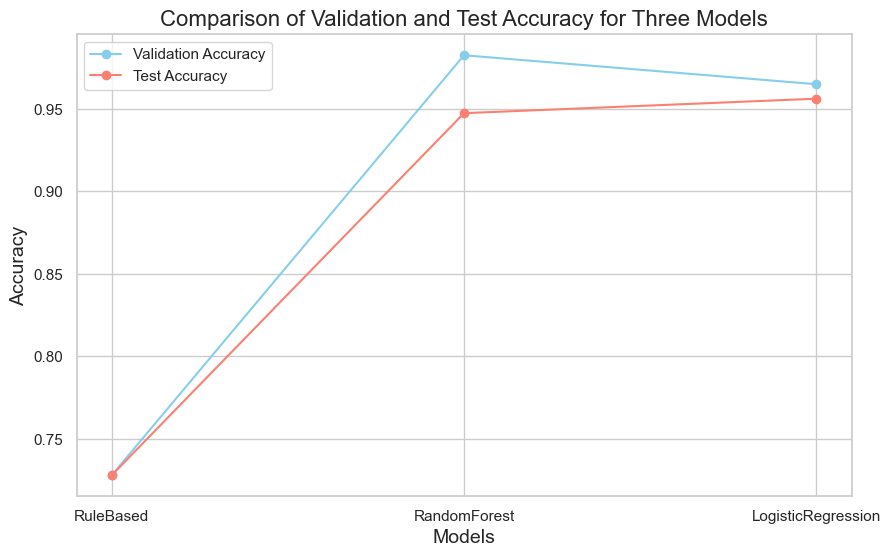

In [24]:
models = ['RuleBased', 'RandomForest', 'LogisticRegression']
validation_accuracy = [val_accuracy1, val_acc, val_accuracy]  
test_accuracys = [test_accuracy1, test_acc, test_accuracy]  
print(test_accuracys)
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(models, validation_accuracy, marker='o', linestyle='-', color='skyblue', label='Validation Accuracy')
plt.plot(models, test_accuracys, marker='o', linestyle='-', color='salmon', label='Test Accuracy')

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Validation and Test Accuracy for Three Models', fontsize=16)
plt.legend()
plt.grid(True)

plt.show()

3. DISCUSSION


In healthcare, interpretability refers to the ability of a system to be comprehended by humans. It indicates that users can understand and trust the processes and consequences of a machine learning model, especially when making high-stakes judgments such as medical diagnosis. Interpretability is critical in healthcare to guarantee that clinical judgments made based on machine learning predictions are transparent, rational, and clinically verified. For example, in the paper "The Mythos of Model Interpretability," interpretability is proposed to include aspects such as transparency (how the model processes its inputs to make decisions) and post-hoc explanations (rationales provided after a decision is made), which could be critical in explaining why an AI system suggested a specific diagnosis.

The possible benefits of interpretability in healthcare include enhanced medical practitioners' faith in AI systems, better patient outcomes due to more accurate and intelligible diagnosis, and easier regulatory compliance and ethical issues. However, the goal of interpretability can sometimes result in trade-offs with model performance, since simpler models that are naturally more interpretable may not reach the same degree of accuracy as more complicated models, such as deep learning networks.

Interpretability may be quantitatively described using metrics that measure the clarity of a model's decision-making process or its ability to generate explanations that are consistent with human domain expertise. For example, a model's interpretability may be determined by its ability to explain its predictions in terms of recognized medical knowledge or diagnostic criteria.

In conclusion, interpretability in healthcare models is a multifaceted notion that includes the clarity, openness, and justifiability of AI predictions, all of which are critical for establishing confidence and assuring the ethical use of AI in clinical contexts.

